In [35]:
%matplotlib inline

from scipy import stats

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.decomposition
import sklearn.tree
import re

In [4]:
train_data = pd.read_csv("../prakhar/train.csv")
val_data = pd.read_csv("../prakhar/validation.csv")

## Request Features (Excluding request text)

Limited to presenting only features collected at request because those will be what are available in the test data as well.

### requester_account_age_in_days_at_request

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe957007ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe957021810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe957021250>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe9570350d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe957035510>,
 'means': []}

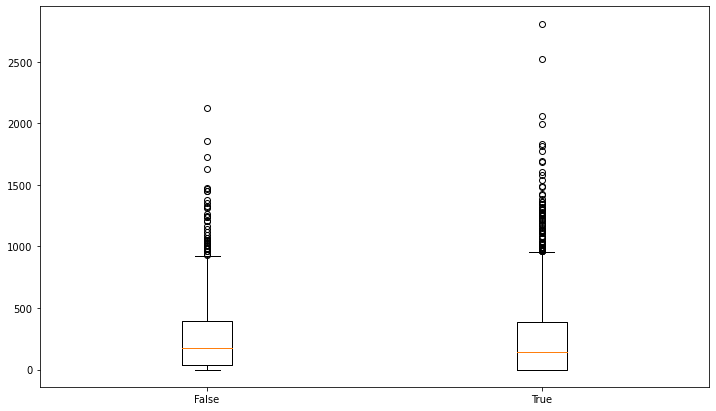

In [5]:
requester_account_age_in_days_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_account_age_in_days_at_request']
requester_account_age_in_days_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_account_age_in_days_at_request']

set_to_plot = [requester_account_age_in_days_at_request_1, requester_account_age_in_days_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

The difference in distribution seems more than the other features analyzed below.

### requester_account_age_in_days_at_retrieval

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5c44050>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5c50e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5c3cf10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5c59f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5c5ddd0>,
 'means': []}

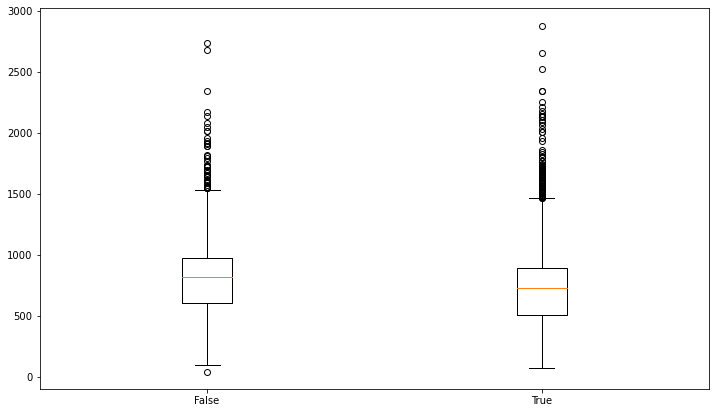

In [11]:
requester_account_age_in_days_at_retrieval_1 = train_data[train_data['requester_received_pizza'] == True]['requester_account_age_in_days_at_retrieval']
requester_account_age_in_days_at_retrieval_0 = train_data[train_data['requester_received_pizza'] == False]['requester_account_age_in_days_at_retrieval']

set_to_plot = [requester_account_age_in_days_at_retrieval_1, requester_account_age_in_days_at_retrieval_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

### requester_subreddits_at_request

In [8]:
requester_subreddits_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_subreddits_at_request']
requester_subreddits_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_subreddits_at_request']

In [9]:
requester_subreddits_at_request_0

0                                                      []
1       ['AskReddit', 'Food_Pantry', 'IAmA', 'RandomAc...
2       ['4chan', 'AdviceAnimals', 'AskReddit', 'AustE...
3       ['24hoursupport', 'AdviceAnimals', 'AskReddit'...
4                                    ['r4r', 'starcraft']
                              ...                        
3627    ['AskReddit', 'IAmA', 'Music', 'discgolf', 'pi...
3628    ['AdviceAnimals', 'AskReddit', 'FL_Studio', 'I...
3629                                                   []
3630    ['2XLookbook', 'AdviceAnimals', 'AskFeminists'...
3635    ['AdviceAnimals', 'AskReddit', 'IAmA', 'Intern...
Name: requester_subreddits_at_request, Length: 2745, dtype: object

#### Relationship between number of subreddits with activity and altruism

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe95718f7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe954797090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe95718f3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe954797950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe957126090>,
 'means': []}

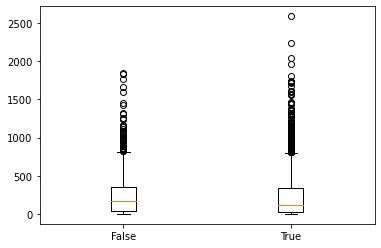

In [10]:
len_requester_subreddits_at_request_1 = []
for r1 in requester_subreddits_at_request_1:
    len_requester_subreddits_at_request_1.append(len(r1))
    
len_requester_subreddits_at_request_0 = []
for r0 in requester_subreddits_at_request_0:
    len_requester_subreddits_at_request_0.append(len(r0))

set_to_plot = [len_requester_subreddits_at_request_1, len_requester_subreddits_at_request_0]

labels = train_data['requester_received_pizza'].unique()

plt.boxplot(set_to_plot, labels=labels)

Those with fulfilled pizza requests seem to be (on average) lesser active in subreddits than those with unfulfilled requests.

#### Relationship between number of "Random" subreddits with activity and altruism

Analyzing activity in the following subreddits:

In [86]:
def find_subreddits(data, to_look_for):
    found_subreddits = []
    for subreddits in data:
        splits_by_line = subreddits.replace(']','').replace('[','').split('\n')
        splits_subreddits = [s.replace("'","").split(",") for s in splits_by_line]
        found_subreddits.append([r for r in splits_subreddits[0] if to_look_for.lower() in r.lower()])
    return found_subreddits

In [87]:
find_subreddits(train_data['requester_subreddits_at_request'],"Random")

[[],
 [' RandomActsOfPizza', ' Random_Acts_Of_Pizza'],
 [],
 [' Random_Acts_Of_Pizza'],
 [],
 [],
 [],
 [' RandomActsOfChristmas', ' RandomKindness', ' Random_Acts_Of_Pizza'],
 [],
 [],
 [],
 [],
 [' Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 ['Random_Acts_Of_Pizza'],
 [' Random_Acts_Of_Pizza'],
 [' RandomActsOfCookies', ' Random_Acts_Of_Pizza'],
 [],
 [' Random_Acts_Of_Pizza'],
 [],
 [' RandomActsOfCookies',
  ' RandomKindness',
  ' Random_Acts_Of_Pizza',
  ' randomacts',
  ' randomactsofcoffee'],
 [' Random_Acts_Of_Pizza'],
 [],
 [],
 [],
 [],
 [],
 [' RandomActsOfPizza'],
 [' RandomKindness', ' Random_Acts_Of_Pizza', ' Random_Acts_of_Books'],
 [' RandomActsOfBras',
  ' RandomActsOfGaming',
  ' RandomActsOfPolish',
  ' RandomMail',
  ' Random_Acts_Of_Amazon',
  ' Random_Acts_of_Etsy',
  ' randomactsofdrawing'],
 [],
 [],
 [' Random_Acts_Of_Pizza'],
 [],
 [],
 [' R

In [89]:
[len(f) for f in find_subreddits(train_data['requester_subreddits_at_request'],"Random")]

[0,
 2,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 7,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [91]:
len_random_requester_subreddits_at_request_1 = []
len_random_requester_subreddits_at_request_1.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_1,"Random")])
print(np.mean(len_random_requester_subreddits_at_request_1))

len_random_requester_subreddits_at_request_0 = []
len_random_requester_subreddits_at_request_0.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_0,"Random")])
print(np.mean(len_random_requester_subreddits_at_request_0))   

0.6307519640852974
0.47358834244080145


Relationship between activity in "Random_Acts_Of_Pizza" subreddits and altruism

In [92]:
len_random_requester_subreddits_at_request_1 = []
len_random_requester_subreddits_at_request_1.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_1,"Random_Acts_Of_Pizza")])
print(np.mean(len_random_requester_subreddits_at_request_1))

len_random_requester_subreddits_at_request_0 = []
len_random_requester_subreddits_at_request_0.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_0,"Random_Acts_Of_Pizza")])
print(np.mean(len_random_requester_subreddits_at_request_0))   

0.4107744107744108
0.3307832422586521


Relationship between activity in 'Food' related subreddits and altruism

In [93]:
len_random_requester_subreddits_at_request_1 = []
len_random_requester_subreddits_at_request_1.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_1,"food")])
print(np.mean(len_random_requester_subreddits_at_request_1))

len_random_requester_subreddits_at_request_0 = []
len_random_requester_subreddits_at_request_0.append(
    [len(f) for f in find_subreddits(requester_subreddits_at_request_0,"food")])
print(np.mean(len_random_requester_subreddits_at_request_0))   

0.12682379349046016
0.08888888888888889


### requester_upvotes_minus_downvotes_at_request

1355.294051627385
1068.5395264116576


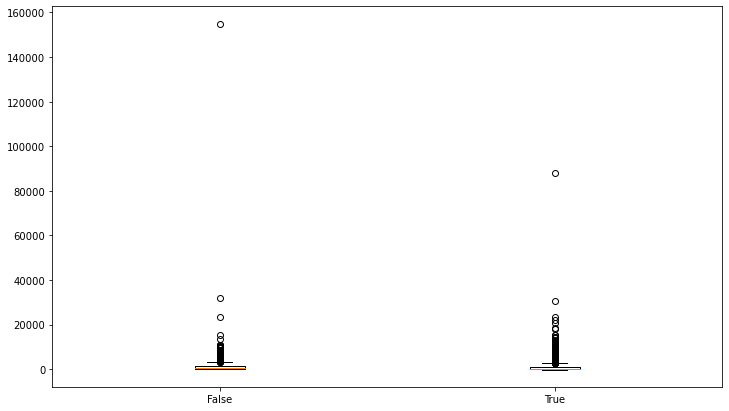

In [98]:
requester_upvotes_minus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_minus_downvotes_at_request']
requester_upvotes_minus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_minus_downvotes_at_request']

set_to_plot = [requester_upvotes_minus_downvotes_at_request_1, requester_upvotes_minus_downvotes_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

print(np.mean(requester_upvotes_minus_downvotes_at_request_1))
print(np.mean(requester_upvotes_minus_downvotes_at_request_0))

Some outlier detection

In [46]:
requester_upvotes_minus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_minus_downvotes_at_request']
requester_upvotes_minus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_minus_downvotes_at_request']
print(len(requester_upvotes_minus_downvotes_at_request_1))
#removing outliers
z = np.abs(stats.zscore(requester_upvotes_minus_downvotes_at_request_1))
#print(z)
requester_upvotes_minus_downvotes_at_request_1_removed_outliers = requester_upvotes_minus_downvotes_at_request_1.where(z < 2)
print(len(requester_upvotes_minus_downvotes_at_request_1_removed_outliers))

print(len(requester_upvotes_minus_downvotes_at_request_0))
#removing outliers
z = np.abs(stats.zscore(requester_upvotes_minus_downvotes_at_request_0))
#print(z)
requester_upvotes_minus_downvotes_at_request_0_removed_outliers = requester_upvotes_minus_downvotes_at_request_0.where(z < 2)
print(len(requester_upvotes_minus_downvotes_at_request_0_removed_outliers))

994
994
3046
3046


### requester_upvotes_plus_downvotes_at_request

4899.536475869809
3327.7052823315116


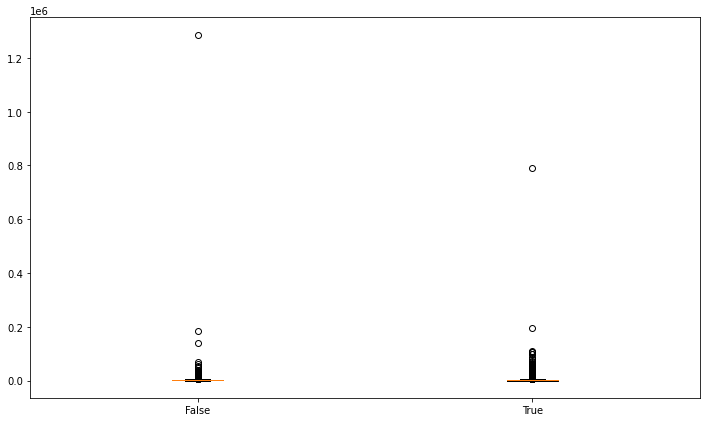

In [100]:
requester_upvotes_plus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_plus_downvotes_at_request']
requester_upvotes_plus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_plus_downvotes_at_request']

set_to_plot = [requester_upvotes_plus_downvotes_at_request_1, requester_upvotes_plus_downvotes_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

print(np.mean(requester_upvotes_plus_downvotes_at_request_1))
print(np.mean(requester_upvotes_plus_downvotes_at_request_0))

### What types of subreddits are most commonly associated with pizza request fulfilment

In [124]:
subreddits_frequency = {}
for r1 in requester_subreddits_at_request_1:
    for s in r1.replace('[','').replace(']','').split(','):
        subreddit = s.replace("'","").replace(" ","")
        if subreddit in list(subreddits_frequency.keys()):
            subreddits_frequency[subreddit] = subreddits_frequency[subreddit]+1
        else:
            subreddits_frequency[subreddit] = 1

sorted_subreddits_frequency = sorted(subreddits_frequency.items(), key=lambda item: item[1], reverse = True)

print(sorted_subreddits_frequency[0:5]) 

[('AskReddit', 566), ('pics', 483), ('funny', 472), ('WTF', 368), ('Random_Acts_Of_Pizza', 366)]


### PCA for request (excluding text) features analyzed or created above

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

It helps extract information from features that is not shared between them so we are not weighing some information more than other because it is contained in a large portion of our selected feautres. 

PCA outputs a set of features (that are independent of one another/orthogonal in the dimensionality space). These are hard to interpret but they hold the information from the variables that we give as input to PCA.  

In [125]:
len_subreddits = []
random_subreddits = []
random_pizza_subreddits = []
food_subreddits = []

request_meta_features = train_data[['requester_account_age_in_days_at_request',
                         'requester_subreddits_at_request',
                         'requester_upvotes_minus_downvotes_at_request',
                         'requester_upvotes_plus_downvotes_at_request',]]


for i,requests in enumerate(request_meta_features['requester_subreddits_at_request']):
    request_meta_features.loc[i,'len_subreddits'] = len(requests)
    request_meta_features.loc[i,'random_subreddits'] = len([r for r in requests if "random" in r.lower()])
    request_meta_features.loc[i,'random_pizza_subreddits'] = len([r for r in requests if "random acts of pizza" in r.lower()])
    request_meta_features.loc[i,'food_subreddits'] = len([r for r in requests if "food" in r.lower()])
    request_meta_features.loc[i,'common_subreddits'] = len([r for r in requests if 
                                                            (sorted_subreddits_frequency[0][0] in r.lower()
                                                            or sorted_subreddits_frequency[1][0] in r.lower()
                                                            or sorted_subreddits_frequency[2][0] in r.lower()
                                                            or sorted_subreddits_frequency[3][0] in r.lower()
                                                            or sorted_subreddits_frequency[4][0] in r.lower())])


pca_features = sklearn.decomposition.PCA(request_meta_features)

print(pca_features)



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


PCA(n_components=      requester_account_age_in_days_at_request  \
0                                     0.000000   
1                                   485.709977   
2                                   508.023090   
3                                   870.720301   
4                                   388.776759   
...                                        ...   
3631                                 33.078773   
3632                                164.810625   
3633                                387.833669   
3634                                491.916146   
3635                                 94.087569   

                        requester_subreddits_at_request  \
0                                                    []   
1     ['AskReddit', 'Food_Pantry', 'IAmA', 'RandomAc...   
2     ['4chan', 'AdviceAnimals', 'AskReddit', 'AustE...   
3     ['24hoursupport', 'AdviceAnimals', 'A...
4                                             102            20.0   
...                           

## Request Text Meta Features

Below we are creating features from meta data of the request text. We intend to use these in addition to the text features we will create using a vectorizer.

In [128]:
request_text_features = train_data[['request_text']]
request_labels = train_data[['requester_received_pizza']]
request_text_features.head()

,request_text
0,"So I posted this on my facebook today:\n\n""Hi,..."
1,It's my 22nd birthday today. Last night I move...
2,Not sure how this whole thing works but I do t...
3,"I don't know if anybody can help, with almost ..."
4,I have a stable job/income but it isn't much a...


In [130]:
#separating train data by topics for analysis
completed_request_indices = [i for i,l in enumerate(request_labels['requester_received_pizza']) if l==True]
not_completed_request_indices = [i for i,l in enumerate(request_labels['requester_received_pizza']) if l==False]


completed_request_train_data = [t for i,t in enumerate(request_text_features['request_text']) if i in completed_request_indices]
not_completed_request_train_data = [t for i,t in enumerate(request_text_features['request_text']) if i in not_completed_request_indices]


In [112]:
print("lengths for pizza request completed: ",
      np.mean([len(x) for x in completed_request_train_data]))
print("lengths for pizza request not completed: ",
      np.mean([len(x) for x in not_completed_request_train_data]))

lengths for pizza request completed:  487.7354124748491
lengths for pizza request not completed:  378.3237032173342


In [113]:
np.std([len(x) for x in request_text_features['request_text']])

373.2832591203276

In [80]:
def lengths_feature(data):
    
    lengths = [len(x) for x in data]
    
    return np.reshape(np.array(lengths),( len(lengths), 1 ))

In [114]:
print("number of words for pizza request completed: ",
      np.mean([len(x.split())for x in completed_request_train_data]))
print("number of words request not completed: ",
      np.mean([len(x.split()) for x in not_completed_request_train_data]))

number of words for pizza request completed:  92.75754527162978
number of words request not completed:  72.55975049244911


In [81]:
def num_words_feature(data):
        
    words = [len(x.split()) for x in data]
        
    return np.reshape(np.array(words),( len(words), 1 ))

In [115]:
print("number of capital letters for pizza request completed: ",
      np.mean([sum(1 for c in x.split() if c.isupper()) for x in completed_request_train_data]))
print("number of capital letters request not completed: ",
      np.mean([sum(1 for c in x.split() if c.isupper()) for x in not_completed_request_train_data]))

number of capital letters for pizza request completed:  4.23440643863179
number of capital letters request not completed:  3.3128693368351936


In [117]:
np.std([sum(1 for c in x.split() if c.isupper()) for x in request_text_features['request_text']])

4.7476326400361675

In [82]:
def num_caps_feature(data):
    
    caps = [sum(1 for c in x.split() if c.isupper()) for x in data]
        
    return np.reshape(np.array(caps),(len(caps), 1))

In [118]:
print("number of capital letters/length for pizza request completed: ",
      np.mean([sum(1 for c in x.split() if c.isupper())/len(x) if len(x)>0 else 0 for x in completed_request_train_data]))
print("number of capital letters/length request not completed: ",
      np.mean([sum(1 for c in x.split() if c.isupper())/len(x) if len(x)>0 else 0  for x in not_completed_request_train_data]))

number of capital letters/length for pizza request completed:  0.008664118563123034
number of capital letters/length request not completed:  0.008466151941604692


In [83]:
def caps_vs_lengths_feature(data):
    
    caps_vs_lengths = [sum(1 for c in x.split() if c.isupper())/len(x) if len(x)>0 else 0 for x in data]
    
    return np.reshape(np.array(caps_vs_lengths),(len(caps_vs_lengths), 1))

In [119]:
print("number of unique words for pizza request completed: ",
      np.mean([len(set(w for w in x.split())) for x in completed_request_train_data]))
print("number of unique words request not completed: ",
      np.mean([len(set(w for w in x.split())) for x in not_completed_request_train_data]))

number of unique words for pizza request completed:  69.44164989939638
number of unique words request not completed:  55.8473407747866


In [84]:
def num_unique_words_feature(data):
    
    num_unique_words = [len(set(w for w in x.split())) for x in data]

    return np.reshape(np.array(num_unique_words),(len(num_unique_words), 1))

In [120]:
print("number of punctuations for pizza request completed: ",
      np.mean([sum(x.count(w) for w in puncs) for x in completed_request_train_data]))
print("number of punctuations request not completed: ",
      np.mean([sum(x.count(w) for w in puncs) for x in not_completed_request_train_data]))

number of punctuations for pizza request completed:  18.00804828973843
number of punctuations request not completed:  13.242613263296127


In [121]:
np.std([sum(x.count(w) for w in puncs) for x in request_text_features['request_text']])

15.149280927290226

In [86]:
puncs = '!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`'
def num_punctuations_feature(data):
    
    num_punctuations = [sum(x.count(w) for w in puncs) for x in data]
        
    return np.reshape(np.array(num_punctuations),(len(num_punctuations), 1))

In [124]:
print("number of stop words for pizza request completed: ",
      np.mean([sum(x.count(w) for w in set(nltk.corpus.stopwords.words('english'))) for x in completed_request_train_data]))
print("number of stop words request not completed: ",
      np.mean([sum(x.count(w) for w in set(nltk.corpus.stopwords.words('english'))) for x in not_completed_request_train_data]))

number of stop words for pizza request completed:  273.51307847082495
number of stop words request not completed:  212.7934996717006


In [87]:
def num_stopwords_feature(data):
    
    num_stopwords = [sum(x.count(w) for w in set(nltk.corpus.stopwords.words('english'))) for x in data]
        
    return np.reshape(np.array(num_stopwords),(len(num_stopwords), 1))

In [179]:
url_regex = re.compile(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))")

completed_requests_with_url = 0
not_completed_request_with_url = 0

for x in completed_request_train_data:
    url_regex_found = [f[0] for f in re.findall(url_regex,str(x))]
    if(len(url_regex_found)>0):
        completed_requests_with_url += 1

for x in not_completed_request_train_data:
    url_regex_found = [f[0] for f in re.findall(url_regex,str(x))]
    if len(url_regex_found)>0:
        not_completed_request_with_url += 1

print("average number of completed request containing a URL:",
      completed_requests_with_url*1.0/len(completed_request_train_data))
print("average number of not completed request containing a URL:",
      not_completed_request_with_url*1.0/len(not_completed_request_train_data))

average number of completed request containing a URL: 0.12457912457912458
average number of not completed request containing a URL: 0.06448087431693988


In [175]:
def requests_with_url(data):
    
    requests_with_url = [1 if len([f[0] for f in re.findall(url_regex,str(x))])>0 else 0 for x in data]
        
    return np.reshape(np.array(requests_with_url),(len(requests_with_url), 1))

In [178]:
np.mean(requests_with_url(completed_request_train_data))

0.12457912457912458

In [180]:
np.mean(requests_with_url(not_completed_request_train_data))

0.06448087431693988